
# [KDT] ch7 Unsupervised Learning

### Clustering / PCA / Association Rule 

 - 데이터셋: 직장인 연봉 정보 / 보스톤 집값 / 식료품 정보 데이터셋 
 - 주요 라이브러리: sklearn linear_model / sklearn.decomposition / mlxtend.preprocessing 
 - 알파 퀴즈(1개) / 파이 퀴즈(1개) / 시그마 퀴즈(2개) / 오메가 퀴즈(과제 1개) 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 원본 파일 로딩 
df_hk = pd.read_csv('.\\data\\hk_221206.csv')

## $\alpha$(알파) 퀴즈:

직장인 연봉 정보 데이터셋을 바탕으로 군집분석을 진행하고자 한다.
<br> 군집분석 진행 전 워밍업으로 지표간 거리 구하기 문제를 풀어 보고자 한다.

<br>p(x1, y1), q(x2, y2) 일때 上) 맨허튼 거리, 下) 유클리드 거리 수식은 아래와 같다

 $$d\left( p,q\right)   = |x_{1}-x_{2}| + |y_{1}-y_{2}| $$

$$d\left( p,q\right)   = \sqrt {  \left( x_{1}-x_{2}\right)^2 + \left( y_{1}-y_{2}\right)^2} $$

In [4]:
df_hk.head()

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [5]:
#첫번째 데이터인 hkd1 의 정보값
df_hk.iloc[0, 8:10]

salary         4100
expenditure    1975
Name: 0, dtype: object

In [6]:
#두번째 데이터인 hkd10 의 정보값
df_hk.iloc[1, 8:10]

salary         4720
expenditure    2970
Name: 1, dtype: object

<b>quiz1)</b> 데이터셋의 첫번째 샘플과 두번째 샘플의 맨허튼거리를 구하라(변수는 salary, expenditure 2가지 활용) 

In [7]:
abs((df_hk.iloc[0, 8] - df_hk.iloc[1, 8])) + abs((df_hk.iloc[0, 9] - df_hk.iloc[1, 9]))

1615

<b>quiz2)</b> 데이터셋의 첫번째 샘플과 두번째 샘플의 유클리드 거리를 구하라(변수는 salary, expenditure 2가지 활용) 

In [8]:
((df_hk.iloc[0, 8] - df_hk.iloc[1, 8])**2 + (df_hk.iloc[0, 9] - df_hk.iloc[1, 9])**2)**0.5

1172.358733494147

## 1-0 Clustering 전처리

df_hk 데이터 셋 250개 샘플을 활용하여 군집을 만들어 세그먼트 분석을 하고자 한다. 
<br> 먼저 계층형 군집분석을 진행한다.  
<br> 군집분석시 활용할 변수는 <b>gender, age, company, grades, salary, expenditure</b> 이다.   
<br> 이때 수치형 변수 age, salary, expenditure는 정규화를 진행하고 정규화한 칼럼은 각각 age_st, salary_st, expenditure_st로 명명한다
<br> 명목형 변수 gender, company, grades는 더미변수화 한다.(drop_first 옵션 false, 순서는 표기된 대로 진행할 것) 
<br> 전체 데이터셋 순서는 표준화한 age, salary, expenditure와 나머지 gender, company, grades 더미변수다.  

<br>
<br> 위 전처리를 마친 후 데이터셋 이름은 <b>basetable1</b>로 명명한다

In [9]:
df_hk.shape

(250, 10)

In [10]:
# df 생성
df_hk_1= df_hk[['gender', "age", "company", "grades", "salary", "expenditure" ]]

In [11]:
# StandardScaling ['age', 'salary', 'expenditure']
from sklearn.preprocessing import StandardScaler
st = StandardScaler().fit( df_hk_1[['age', 'salary', 'expenditure']])
st_table = pd.DataFrame(st.transform(df_hk_1[['age', 'salary', 'expenditure']]), columns=['age_st', 'salary_st', 'expenditure_st'])

In [12]:
# get_dummies ['gender', 'company', 'grades']
df_dummy = pd.get_dummies( df_hk_1[['gender', 'company', 'grades']])

In [13]:
# basetable1
basetable1 = pd.concat( [df_hk_1, st_table, df_dummy], axis=1)
basetable1

,gender,age,company,grades,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,F,22,A,A,4100,1975,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,F,31,A,B,4720,2970,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,F,55,A,B,7280,5905,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0
3,F,28,B,B,4060,2935,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0
4,M,29,B,F,4390,4015,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,F,50,A,A,6990,4865,1.245864,0.342627,-0.057328,1,0,1,0,0,1,0,0,0,0
246,F,51,A,A,7110,4985,1.361651,0.407630,0.007279,1,0,1,0,0,1,0,0,0,0
247,M,52,A,B,8000,6625,1.477438,0.889730,0.890240,0,1,1,0,0,0,1,0,0,0
248,M,53,A,B,8760,7385,1.593224,1.301411,1.299417,0,1,1,0,0,0,1,0,0,0


In [14]:
basetable1.describe()

,age,salary,expenditure,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
count,250.000000,250.000000,250.000000,2.500000e+02,2.500000e+02,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000
mean,39.240000,6357.480000,4971.480000,-6.039613e-16,1.119105e-16,4.081180e-16,0.448000,0.552000,0.400000,0.400000,0.200000,0.316000,0.464000,0.12800,0.064000,0.028000
std,8.653899,1849.791383,1861.112508,1.002006e+00,1.002006e+00,1.002006e+00,0.498286,0.498286,0.490881,0.490881,0.400802,0.465846,0.499703,0.33476,0.245244,0.165304
min,20.000000,3080.000000,1330.000000,-2.227735e+00,-1.775365e+00,-1.960540e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,33.000000,5002.500000,3593.750000,-7.225088e-01,-7.339736e-01,-7.417573e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,39.000000,6100.000000,4762.500000,-2.778880e-02,-1.394733e-01,-1.125129e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,46.000000,7427.500000,6272.500000,7.827178e-01,5.796148e-01,7.004573e-01,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000
max,55.000000,11990.000000,10865.000000,1.824798e+00,3.051057e+00,3.173017e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 1-1. Clustering - Hierarchical Clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수를 바탕으로 Hierarchical 군집분석을 시행한다
<br>(sklearn AgglomerativeClustering 진행) 

In [16]:
# 대상 df 생성, age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수
basetable_cluster_1 = basetable1.iloc[ : , 6:]
basetable_cluster_1

,age_st,salary_st,expenditure_st,gender_F,gender_M,company_A,company_B,company_C,grades_A,grades_B,grades_C,grades_D,grades_F
0,-1.996162,-1.222845,-1.613278,1,0,1,0,0,1,0,0,0,0
1,-0.954082,-0.887000,-1.077579,1,0,1,0,0,0,1,0,0,0
2,1.824798,0.499716,0.502599,1,0,1,0,0,0,1,0,0,0
3,-1.301442,-1.244513,-1.096422,1,0,0,1,0,0,1,0,0,0
4,-1.185655,-1.065756,-0.514960,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.245864,0.342627,-0.057328,1,0,1,0,0,1,0,0,0,0
246,1.361651,0.407630,0.007279,1,0,1,0,0,1,0,0,0,0
247,1.477438,0.889730,0.890240,0,1,1,0,0,0,1,0,0,0
248,1.593224,1.301411,1.299417,0,1,1,0,0,0,1,0,0,0


In [17]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

cluster_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(basetable_cluster_1)

In [18]:
# Attribute
cluster_1

AgglomerativeClustering(n_clusters=3)

In [19]:
# cluster_1.labels_
cluster_1.labels_

array([2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### 계층형 군집분석 시각화: dendrogram(60개 샘플 대상)  

In [ ]:
# dendrogram 그리기 (10개)

from scipy.cluster.hierarchy import dendrogram, linkage

link_10 = linkage(basetable_cluster_1.iloc[:10, ], 'ward')
dendrogram(link_10) 
plt.show()
print(link_10) # link : cluster링 결과, 처음 두 개는 행 번호, 거리, 클러스터에 속한 데이터 수

In [ ]:
# dendrogram 그리기 (60개)

from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize =(10,4))
link_60 = linkage(basetable_cluster_1.iloc[:60, ], 'ward')
dendrogram(link_60) 
plt.show()

In [ ]:
# 예측, 새로운 정보값으로 예측할때 사용
# basetable1['cluster_hier'] 
basetable1['cluster_hier'] = cluster_1.fit_predict( basetable_cluster_1) 
basetable1

In [ ]:
# 타겟값 맵핑 {0:'a', 1:'b', 2:'c'}

basetable1['cluster_hier'] = basetable1['cluster_hier'].map({0:'a', 1:'b', 2: 'c'})
basetable1

In [ ]:
pd.crosstab(basetable1['company'], basetable1['cluster_hier'])

### cluster / company에 따른 scatter plot 

In [ ]:
# 회사별 분류 

fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))
sns.scatterplot(x='age', y='salary', data=basetable1, hue='company',  palette='Set1', ax= ax[0] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_hier',  palette='Set2', ax=ax[1] )

ax[0].set_title('category : company ')
ax[1].set_title('category : hierarchy cluster')

hierarchy cluster는 군집 A: 고 연령 / 고 연봉 , 군집 B: 중상 연령, 중저 연봉, 군집 C: 저 연령 / 저 연봉 으로 분류

In [ ]:
basetable1.groupby(['cluster_hier'])[['age', 'salary', 'expenditure']].mean()

In [ ]:
basetable1.groupby(['cluster_hier'])[['age', 'salary', 'expenditure']].describe()

## 1-2. Clustering - K means

age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수를 바탕으로 K-means 군집분석을 시행한다
<br> (sklearn KMeans 진행, n_cluster = 3, random_state=123)

In [ ]:
# basetable_cluster_1 (df, age_st, salary_st, expenditure_st, gender, company, grades 각각 더미변수 총 13개 변수)
basetable_cluster_1[:2]

In [ ]:
from sklearn.cluster import KMeans

<b><kmeans split 에러시 threadpoolctl 업그레이드 필요> </b>
<br>!pip install threadpoolctl --user --upgrade
<br>import threadpoolctl
<br>threadpoolctl.__version__ <- 3.0 이상 필요 

In [ ]:
# K-means 모델 n_clusters=3, random_state=123
# cluster_1_2 = 
cluster_1_2 = KMeans( n_clusters=3, random_state=123).fit(basetable_cluster_1) 

In [ ]:
# Attribute 확인
cluster_1_2

In [ ]:
#k - means 라벨값 
# basetable1['cluster_kmean'] = 
basetable1['cluster_kmean'] = cluster_1_2.labels_

In [ ]:
basetable1[:2]

In [ ]:
# crosstab 'cluster_hier' 'cluster_kmean'
pd.crosstab( basetable1['cluster_hier'], basetable1['cluster_kmean'])

In [ ]:
# crosstab 'company' 'cluster_kmean'
pd.crosstab( basetable1['company'], basetable1['cluster_kmean'])

In [ ]:
# 회사별 분류 

fig, ax = plt.subplots( nrows= 1 , ncols=3, figsize=(16, 5))
sns.scatterplot(x='age', y='salary', data=basetable1, hue='company',        palette='Set1', ax=ax[0] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_hier',   palette='Set1', ax=ax[1] )
sns.scatterplot(x='age', y='salary', data=basetable1, hue='cluster_kmean',  palette='Set1', ax=ax[2] )

ax[0].set_title('category : company ')
ax[1].set_title('category : hierarchy cluster')
ax[2].set_title('category : kmeans cluster')
plt.show()

## 1-4. Clustering 평가 - Elbow score
- kmeans inertia_ 활용

Inertia 값, 군집화후 각 중심점에서 군집의 데이타간 거리를 합산한것으로 응집도를 나타내는 값 

값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있음

In [ ]:
# n_clusters=k를 1부터 10까지 적용

inertias = []
mapping = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(basetable_cluster_1) 
    inertias.append(kmeanModel.inertia_)
    mapping[k] = kmeanModel.inertia_
    print('k값 ', k , '=>', kmeanModel.inertia_)

In [ ]:
# Elbow score 시각화
plt.plot(np.arange(1, 10), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## 1-5. Clustering 평가 - Silhouette Test

silhouette score는 1에 가까워야 positive

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
k_score = pd.DataFrame(columns =['k', 'score'])
for i in np.arange(2, 7):
    model_clustering = KMeans( n_clusters=i, random_state=123).fit(basetable_cluster_1)
    a = silhouette_score( basetable_cluster_1,model_clustering.labels_)
    k = pd.DataFrame({'k':[i], 'score':[a]})
    k_score = pd.concat([k_score, k]).reset_index(drop=True)
    print("K값 ", i, " silhouette score: ", a.round(3) )

In [ ]:
sns.lineplot(x='k', y='score', data=k_score)
plt.xticks([2, 3, 4, 5, 6])
plt.show()

### K 값에 따른 scatter plot

In [ ]:
# K값 2~5까지 cluster_model, cluster_label 생성
cluster_model_k1 = KMeans( n_clusters=2, random_state=123).fit(basetable_cluster_1)
cluster_model_k2 = KMeans( n_clusters=3, random_state=123).fit(basetable_cluster_1)
cluster_model_k3 = KMeans( n_clusters=4, random_state=123).fit(basetable_cluster_1)
cluster_model_k4 = KMeans( n_clusters=5, random_state=123).fit(basetable_cluster_1)

cluster_plot = basetable1.copy()
cluster_plot['cluster_k1'] = cluster_model_k1.labels_
cluster_plot['cluster_k2'] = cluster_model_k2.labels_
cluster_plot['cluster_k3'] = cluster_model_k3.labels_
cluster_plot['cluster_k4'] = cluster_model_k4.labels_

In [ ]:
# K별 Plot 

fig, ax = plt.subplots( nrows= 2 , ncols=2, figsize=(8, 8))
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k1',  palette='Set1', ax= ax[0][0] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k2',  palette='Set1', ax=ax[0][1] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k3',  palette='Set1', ax=ax[1][0] )
sns.scatterplot(x='age', y='salary', data=cluster_plot, hue='cluster_k4',  palette='Set1', ax=ax[1][1] )


ax[0][0].set_title('K : 2')
ax[0][1].set_title('K : 3')
ax[1][0].set_title('K : 4')
ax[1][1].set_title('K : 5')
plt.show()

## 1-6. Clustering 예측

250개 데이터 셋을 바탕으로 군집분석을 실시 하였다.
<br> 250개 외 추가 데이터 셋 샘플을 추가 할 경우, 모델을 바탕으로 기존 군집분석을 바탕으로 Cluster를 분류 할 수 있다. 
<br> 모델은 Kmeans 알고리즘을 통해 3개 cluster로 분류한 cluster_1_2 모델을 활용한다.

<br> 데이터셋 샘플 - 성별:남성 / age:33 / company :C / grades: B / salary : 4500 / expenditure: 2975

<br> <b>작업순서</b>
<br> 1.수치형 변수 표준화 -> 2. 더미변수 확인 -> 3. 데이터 프레임에 맞춰 데이터 셋 준비 -> 4.Cluster 예측 

In [ ]:
# basetable1
basetable1.head(3)

In [ ]:
basetable_cluster_1.head(3)

In [ ]:
#sample_1 나이:33, 연봉:4500, 소비액:2975
#sample_1 = 
sample_1 = pd.DataFrame({'age':[33], 'salary':[4500], 'expenditure':[2975]})

In [ ]:
#기존 표준화 모델 활용
st.transform(sample_1)

In [ ]:
#sample_1 DataFrame 변경
#sample_1_num = 
sample_1_num = pd.DataFrame( st.transform(sample_1), columns = ['age_st', 'salary_st', 'expenditure_st'])
sample_1_num

In [ ]:
#dummy DataFrame 생성
#sample_1_dummy =
sample_1_dummy = pd.DataFrame( [[0,0,0,0,0,0,0,0,0,0]], columns = df_dummy.columns)
sample_1_dummy

In [ ]:
#dummy변수 정보값 생성, 'gender_M', 'company_C', 'grades_B'
sample_1_dummy['gender_M'] = 1
sample_1_dummy['company_C'] = 1
sample_1_dummy['grades_B'] = 1

In [ ]:
sample_1_dummy

In [ ]:
# 최종 DataFrame 만들기, sample_1_num,  sample_1_dummy concat
# predic_sample1 = 
predic_sample1 = pd.concat([ sample_1_num, sample_1_dummy], axis=1)
predic_sample1 

In [ ]:
# predic_sample1로 cluster 예측
cluster_1_2.predict( predic_sample1)
# print("cluster 번호는 : ", cluster_1_2.predict( predic_sample1)[0])

## Quiz) 추가 예측 

<br> cluster 예측모델로 아래 데이터의 결과를 예측하시오 
<br> 성별:여성 / age:43 / company :B / grades: B / salary : 7900 / expenditure: 6000

In [ ]:
# 기존 DataFrame을 사용하여 sample DataFrame 만들기 : to_dict() 활용
basetable_cluster_1[:2]
basetable_cluster_1[:1]
basetable_cluster_1[:1].to_dict()

#z표준화
st.transform([[  43, 7900, 6000]]) 

# 추가 정보값 입력
predic_sample2 = pd.DataFrame(
{'age_st': {0: 0.43535785},
 'salary_st': {0: 0.83556143},
 'expenditure_st': {0: 0.5537458},
 'gender_F': {0: 1},
 'gender_M': {0: 0},
 'company_A': {0: 0},
 'company_B': {0: 1},
 'company_C': {0: 0},
 'grades_A': {0: 0},
 'grades_B': {0: 1},
 'grades_C': {0: 0},
 'grades_D': {0: 0},
 'grades_F': {0: 0}})

predic_sample2


cluster_1_2.predict( predic_sample2)
print("cluster 번호는 : ", cluster_1_2.predict( predic_sample2)[0])

In [ ]:
# 기존방법
sample_2 = pd.DataFrame({'age':[43], 'salary':[7900], 'expenditure':[6000]})
sample_2_num = pd.DataFrame( st.transform(sample_2), columns = ['age_st', 'salary_st', 'expenditure_st'])
sample_2_dummy = pd.DataFrame( [[0, 0,0,0,0,0,0,0,0,0]], columns = df_dummy.columns)
sample_2_dummy['gender_F'][0] = 1
sample_2_dummy['company_B'][0] = 1
sample_2_dummy['grades_B'][0] = 1
predic_sample2 = pd.concat([ sample_2_num, sample_2_dummy], axis=1)

predic_sample2

In [ ]:
# predic_sample2로 cluster 예측
print("cluster 번호는 : ",  cluster_1_2.predict( predic_sample2)[0])

## 2. $\pi$(파이) 퀴즈 : 붓꽃 데이터 셋 활용 Kmeans / Hierachy 

sklearn 라이브러리 활용을 통한 붓꽃 품종 분류 
<br>
<br> 워밍업: x축을 'sepal_length'으로 y축을 'petal_length'로 scatter plot을 도식화 하시오. 
<br> 이때 라이브러리는 seaborn을 활용하고 'species' 그룹에 따라 색깔을 다르게 표현하시오.

In [8]:
# 파일 로딩 
df_iris = pd.read_csv('c:ktd_2_data230224\iris.csv')

In [9]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


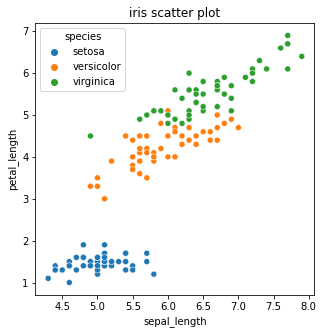

In [11]:
# iris scatter plot, x='sepal_length',  y='petal_length'

fig  = plt.figure( figsize=(5, 5))
sns.scatterplot( data =df_iris, x='sepal_length',  y='petal_length', hue='species')

plt.title('iris scatter plot')
plt.show()

<br> 계층형 군집분석을 통해 3개의 군집으로 분류하고자 한다. 
<br> 수치형 4개 변수 모두 활용해 minmax 정규화를 1차로 수행한 후 
<br> sklearn의 AgglomerativeClustering 메소드를 활용, 하이퍼 파라미터값은 하단을 참조하여 군집분석을 수행하라
<br> (n_clusters=3, affinity='manhattan', linkage='average')
<br>
<br><b> 문제: 3개 클러스터별 'sepal_length' 평균을 확인하고 평균값이 가장 높은 클러스터의 'sepal_length' 평균을 구하라</b>

In [12]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

In [13]:
iris_scaler = MinMaxScaler()
iris_scaler.fit_transform(df_iris.drop('species', axis=1))
df_iris_sc = pd.DataFrame( iris_scaler.fit_transform(df_iris.drop('species', axis=1)), columns = df_iris.columns[:-1])

In [14]:
df_iris_sc

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [18]:
# AgglomerativeClustering, (n_clusters=3, affinity='manhattan', linkage='average')
model_2 = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average').fit(df_iris_sc)

In [19]:
model_2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2], dtype=int64)

In [ ]:
df_iris['cluster'] = model_2.labels_

In [ ]:
df_iris.groupby('cluster')['sepal_length'].mean().nlargest()

In [ ]:
# pd.crosstab
pd.crosstab(df_iris['species'], df_iris['cluster']) # setosa는 구분이 잘 됬고, versicolor, virginica 일부 중첩

In [ ]:
# 시각화
fig, ax = plt.subplots( nrows= 2 , ncols=2,  figsize=(10,10))

sns.scatterplot( data = df_iris, x='sepal_length',  y='petal_length', hue='species' , palette='Set1', ax= ax[0][0])
sns.scatterplot( data = df_iris,  x='sepal_length',  y='petal_length', hue='cluster', palette='Set2',ax= ax[0][1])
sns.boxplot( data = df_iris, x='species', y='sepal_width' , palette='Set1', ax= ax[1][0])
sns.boxplot( data = df_iris, x='cluster', y='sepal_width' , palette='Set2', ax= ax[1][1])

#### (추가) 집단간 sepal_length 평균 차이가 통계적으로 유의미하게 차이 나는지 확인해 보기 

<br> species가 versicolor 인 데이터셋과 이와 유사한 클러스터와 sepal_length 평균 차이 확인해 본다.
<br> shapiro 메소드를 통해 정규성을 확인하고 scipy의 ttest_ind 메소드를 활용할 것 

In [ ]:
from scipy.stats import shapiro, ttest_ind

# p-vaue 0.05 이상이면 정규성 만족 
a = df_iris.loc[ df_iris['species']=='versicolor', 'sepal_length']
b = df_iris.loc[ df_iris['cluster']==2, 'sepal_length']

# shapiro Test, p-vaue 0.05 이상이면 정규성 만족 
print( shapiro(a))
print( shapiro(b)) 

# 두 집단의 평균의 차이, ttest_ind
ttest_ind( a, b) # p_value 0.05 초과, 귀무가설 채택, 차이 없다 
print( 'ttest_ind Result: ', ttest_ind( a, b))

print( 'a.mean(): ', a.mean())
print( 'b.mean(): ', b.mean())

## 3. PCA 

<br> 주성분 분석(Principal Component Analysis, PCA) 가장 널리 사용되는 차원 축소 기법 중 하나
<br> iris 데이터 활용 

In [ ]:
#  df 생성
df_iris_2 = df_iris.iloc[ :, :4]
df_iris_2

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df_iris_2)

In [20]:
#정규화
iris_std = StandardScaler().fit_transform(df_iris_2)
df_iris_std = pd.DataFrame(iris_std, columns =  df_iris_2.columns)
df_iris_std

NameError: name 'StandardScaler' is not defined

In [ ]:
#공분산행렬 확인 
import numpy as np 
cov_matrix = np.cov(df_iris_std.T)

In [ ]:
cov_matrix

In [ ]:
#고유값(분산설명력, explained_variance), 고유벡터 추출(사영계수, components)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [ ]:
#고유값(분산설명력, explained_variance)
eigenvalues

In [ ]:
#고유벡터 추출(사영계수, components)
eigenvectors

In [ ]:
pca_iris = pd.DataFrame({'pca1':df_iris_std @ eigenvectors.T[0], 'pca2':df_iris_std @ eigenvectors.T[1], 
                         'pca3':df_iris_std @ eigenvectors.T[2], 'pca4':df_iris_std @ eigenvectors.T[3]})

In [ ]:
pca_iris[:2]

In [ ]:
# 시각화 비교 
fig, ax = plt.subplots( nrows= 1 , ncols=2,  figsize=(6,3))

sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data=df_iris_2,   ax= ax[0])
sns.scatterplot(x = 'pca1', y = 'pca2',                data=pca_iris,    ax= ax[1])

ax[0].set_title('sepal_length, sepal_width')
ax[1].set_title('pca1, pca2')

plt.show()

In [ ]:
#PCA 라이브러리 
from sklearn.decomposition import PCA
pc = PCA()
pc.fit(df_iris_std)

In [ ]:
#고유값(분산설명력, explained_variance), eigenvalues 비교
pc.explained_variance_, eigenvalues

In [ ]:
#고유벡터 확인(사영계수, components)
pc.components_, eigenvectors

In [ ]:
#pca1
df_iris_std @ pc.components_[0]

In [ ]:
# eigenvectors로 계산한것과 비교
pca_iris

In [ ]:
# transform으로 PCA 계산, df_iris_std @ pc.components_[0]
pd.DataFrame(pc.transform(df_iris_std), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

In [ ]:
# 누적 분산 설명력(explained_variance_ratio_)
print(pc.explained_variance_ratio_)
print(pc.explained_variance_ratio_.cumsum())

In [ ]:
# 누적 분산 설명력(explained_variance_ratio_) 시각화
sns.lineplot(x = [1,2,3,4], y=pc.explained_variance_ratio_.cumsum())
plt.xticks([1,2,3,4])
plt.title('explained_variance_ratio_')
plt.show()

### 콘크리트 데이터 셋 활용, PCA 통해 만든 합성변수로 종속변수 strength을 예측하는 다중 회귀 분석 모델 설계
<br>1030 rows × 9 columns
<br> 라이브러리 : from sklearn.decomposition import PCA

In [ ]:
# brick_concrete.csv 파일 로딩
df_brick = pd.read_csv('.\\data\\yellowbrick_concrete.csv')

In [ ]:
df_brick

In [ ]:
df_brick.info()

각 변수별 상관계수 매트릭스 플롯 시각화 

In [ ]:
# heatmap
fig = plt.figure( figsize=(5,5))

sns.heatmap( df_brick.corr(), annot=True)
plt.show()

In [ ]:
#다중 공선성 VIF 로 feature 특성 파악

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = df_brick.columns
vif['VIF'] = [variance_inflation_factor(df_brick.values, i) for i in range(df_brick.shape[1])]
vif.sort_values('VIF', ascending = False)

VIF 지수가 10 초과하는 변수들이 다수 존재 
<br> PCA를 통해 차원 축소, 복잡성을 줄이자!

PCA 프로세스
<br>1.정규화 -> 2. 공분산 행렬 계산 -> 3. 공분산 행렬 고유벡터와 고유값 계산 -> 4. 주성분 구하기

### 1.정규화

In [ ]:
# 정규화
sc3 = StandardScaler()
df_brick_sc = pd.DataFrame( sc3.fit_transform( df_brick.drop('strength', axis=1)), columns =  df_brick.drop('strength', axis=1).columns )
df_brick_sc

### 2. 공분산 행렬 계산 / 3. 공분산 행렬 고유벡터와 고유값 계산
sklearn.decomposition 라이브러리를 통해 자동 추출

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_model = PCA(random_state=123).fit(df_brick_sc)

In [ ]:
pca_model

In [ ]:
#고유값  
# pd.Series( pca_model.explained_variance_ )
pca_model.explained_variance_

In [ ]:
#고유벡터 (사영계수)
pd.DataFrame(pca_model.components_, columns = df_brick_sc.columns)

### 4. 주성분 구하기

In [ ]:
# transform, 이때 columns의 값은 pca1~8로 변경되어야 함
pd.DataFrame( pca_model.transform(df_brick_sc) , columns = df_brick_sc.columns)

### 합성변수의 수는 행 수: 데이터셋 수 / 칼럼 수 : 데이터셋 칼럼 수
데이터셋 칼럼 수 만큼의 합성 변수가 만들어 진다.
<br>(ex: 10개의 칼럼이 있으면 PCA 후 합성변수 수는 총 10개) 

In [ ]:
#합성변수 transform + pca1~8 columns 생성 (1030 rows X 8 columns)
df_brick_pca = pd.DataFrame( pca_model.transform(df_brick_sc) , columns = [ 'pca_'+ str(i) for i in  range(1,9)] )
df_brick_pca

PCA 설명력 확인 6개 합성 변수를 통해 90% 이상 설명 가능 하다 

In [ ]:
pca_model.explained_variance_ratio_

In [ ]:
pca_model.explained_variance_ratio_.cumsum()

## PCA 절차 정리
1) df

2) sc = StandardScaler().fit_transform(df)

3) PCA().fit(sc) => explained_variance_ , explained_variance_ratio_

4) PCA().fit_transform(sc)

In [ ]:
# 1) df (  df_brick_sc_1  )
# 2) sc = StandardScaler().fit_transform(df)
sc = StandardScaler().fit_transform( df_brick.drop('strength', axis=1))
pd.DataFrame(sc)

In [ ]:
# 3) PCA().fit(sc) => explained_variance_ , explained_variance_ratio_

model_pca = PCA(random_state=123).fit(sc)
model_pca.explained_variance_

In [ ]:
# 4) PCA().fit_transform(sc)
tran_pca = PCA(random_state=123).fit_transform(sc)
pd.DataFrame(tran_pca)[:5]

## 3. $\pi$(파이) 퀴즈 : 아래 회귀분석을 시행하고 평가결과를 비교하시오

 - case 1) 종속변수: df_brick['strength'], 독립변수: df_brick_sc 변수 8개 로 회귀분석
 - case 2) 종속변수: df_brick['strength'], 독립변수: df_brick_sc PCA합성변수 6개 로 회귀분석
 - case 1)과 case 2)의 RMSE를 비교하라

In [ ]:
df_brick_sc[:2]

In [ ]:
df_brick_pca[:2]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



## 4. Asociation rules

250명의 식료품 구매 이력을 바탕으로 연관성 분석 수행
<br> (file: hkdataset_associaterules.csv - 식료품 데이터셋)
<br> (file: hk_221206.csv - hk_table, 회사원 데이터 셋)

<br> A회사 임직원을 대상으로 연관성 규칙 확인 
<br> 우유를 단일 선행으로 하는 규칙을 만들며 후행 품목 수는 상관없다.    
<br> 이를 위해 A회사 100명의 식료품 구매 이력을 확인하여 A회사 임직원 대상으로 장바구니 분석을 수행한다.
<br> 이때 우유를 선행으로 하는 규칙 중 Lift 값이 가장 높은 item은 무엇인지 확인하시오.
<br> HINT: 식료품 데이터셋과 회사원 데이터셋을 join하여 사용. 
<br> 
<br><b> 관련 라이브러리 및 하이퍼 파라미터 값 </b>
<br> from mlxtend.preprocessing import TransactionEncoder
<br> from mlxtend.frequent_patterns import apriori, association_rules
<br> 조건 min_support=0.1, min_confidence=0.01

Asociation rules 를 위해 mlxtend install 필요

!pip install mlxtend

In [ ]:
# !pip install mlxtend

In [ ]:
# 파일 로딩
df_asso = pd.read_csv('.\\data\\hkdataset_associaterules.csv')

In [ ]:
df_asso #250명의 식료품 구매 내역 데이터

In [ ]:
# 파일 로딩 
df_hk= pd.read_csv('.\\data\\hk_221206.csv')
df_hk= df_hk.rename(columns = {'name':'id'})

In [ ]:
# merge (left join)
df_asso = pd.merge( df_asso, df_hk[['id', 'company']], how='left', on='id' )
df_asso

In [ ]:
df_asso['company'].value_counts()

In [ ]:
# A회사 추출
df_asso  = df_asso.loc[ df_asso['company'] == 'A', : ]

In [ ]:
df_asso[:5]

In [ ]:
# case 1)
# id별로 item 정리
datatable3 = df_asso.groupby('id').apply( lambda x: x['item'].tolist()).reset_index().rename(columns={0:'item'})
datatable3

In [ ]:
# import TransactionEncoder, apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
te1 = TransactionEncoder()
te1_result = te1.fit(datatable3['item'] )

In [ ]:
# TransactionEncoder attribute 확인
te1.columns_mapping_

In [ ]:
# TransactionEncoder attribute 확인
te1.columns_

In [ ]:
# transform
te1_trans = pd.DataFrame( te1.transform( datatable3['item']), columns =te1.columns_ )
te1_trans

In [ ]:
# apriori
apri1 = apriori(te1_trans, use_colnames=True,  min_support=0.1)
apri1

In [ ]:
# association_rules
asso1 = association_rules( apri1, metric='confidence', min_threshold=0.5)  # 0.1
asso1

In [ ]:
asso1['antecedents'].values[:10]

우유를 사는 고객은 후행으로 어떤 상품을 많이 사는지 lift 내림차순으로 정렬 

In [ ]:
asso1.loc[ asso1['antecedents'] == frozenset({'Milk'}), : ].sort_values('lift', ascending=False).head(10)

정답 : Corn(lift: 1.59) 

In [ ]:
# case 2
df_asso[:5]

In [ ]:
# pivot_table 생성
df_asso['cnt'] = True
df_pivot = pd.pivot_table(df_asso, values='cnt', index='id', columns='item', aggfunc = 'max', fill_value= False)

In [ ]:
df_pivot

In [ ]:
# apriori

from mlxtend.frequent_patterns import apriori, association_rules

apri2 = apriori(df_pivot, min_support= 0.1, use_colnames=True)
apri2

In [ ]:
# association_rules
asso2 = association_rules( apri2, metric='confidence', min_threshold=0.5)  # 0.1
asso2

## $\Omega$(오메가) Quiz1 (연관규칙을 생성하고 아래에 답하시오)

Mart (association_rules_mart.csv) 데이터셋 활용 
<br>40,000 rows X 3 columns

<br>1. 한 번에 2개를 구매한 것은 삭제하시오. (ID와 Item이 중복되는것)
<br>hint: drop_duplicates (34,766 rows)
<br>2. 연관성 규칙을 생성하시오 (min_support=0.005, min_threshold=0.005)
<br>3. 선행(antecedents)이 단일 Item 인것을 대상으로 데이터 셋을 구성하시오
<br>4. support가 0.01보다 큰 것중(>= 0.01) lift가 가장 높은 선행, 후행 Item을 고르시오

In [ ]:
# case1) pivot 사용
# 파일 로딩
df_mart = pd.read_csv('.\\data\\association_rules_mart.csv')
df_mart

In [ ]:
# step1) drop_duplicates


In [ ]:
# step2) min_support=0.005, min_threshold=0.005

from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# apriori


In [ ]:
# association_rules


In [ ]:
# step3) antecedents이 단일 Item 추출


In [ ]:
mart_asso_1

In [ ]:
# step4) support가 0.01 보다 큰 것중 lift가 가장 높은 선행과 후행을 고르시오


In [ ]:
# case 2) transactionencoder 사용
# 파일 로딩
df_mart_2 = pd.read_csv('.\\data\\association_rules_mart.csv')
df_mart_2

In [ ]:
# step1) drop_duplicates


In [ ]:
# step2) min_support=0.005, min_threshold=0.005
# step2) transactionencoding

from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# apriori,  association_rules


In [ ]:
# step3) antecedents이 단일 Item 추출


In [ ]:
mart_asso_2_1

In [ ]:
# step4) support가 0.01 보다 큰 것중 lift가 가장 높은 선행과 후행을 고르시오


## $\Omega$(오메가) Quiz2 (연관규칙을 생성하고 아래에 답하시오)

seaborn 라이브러리 택시 데이터셋 활용 
<br>6433 rows × 14 columns

<br> 당신은 미국 맨하탄에 공유자동차 서비스를 기획하고자 한다. 
<br> 프로토타입으로 Upper East Side North에서 출발하는 가장 가능성이 높은 공유 노선을 설정하고자 한다. 
<br> 이를 위해 아래 단계를 거쳐 연관성 분석을 수행한다. 
<br> 1. 결측치 제거 후 진행 
<br> 2. 택시 데이터 셋을 바탕으로 색상은 노랑색(yellow)에 맨허튼에서 픽업을 한 택시로 필터링한 데이터를 바탕으로 분석을 진행한다. 
<br> 3. pickup_zone/ dropoff_zone 칼럼을 이용하여 파생변수('rules')를 생성한다. ([pickup_zone, dropoff_zone] 형식)
<br> ex) pickup_zone = 'A', dropoff_zone = 'B' 일때 [A, B]로 생성
     hint) 
<br> 4. from mlxtend.preprocessing import TransactionEncoder를 바탕으로 연관성 분석 전처리 데이터셋을 만들고
<br> 5. 연관성 분석을 실행하시오 (최소 기준 support =0.001, confidence = 0.1)
<br>  5-1. lift가 가장 높은 선행, 후행 구간을 구하시오
<br>  5-2. Bloomingdale가 선행일때 lift 값이 가장 높은 후행을 찾으시오

In [ ]:
# case1) TransactionEncoder 활용
# step1 파일로딩, 결측치 제거,


In [ ]:
# step2 yellow & Manhattan 필터링


In [ ]:
# step3  pickup_zone, dropoff_zone 파생변수 ('rules')

In [ ]:
# quiz3['rules'] = [ [quiz3['pickup_zone'][i]] + [quiz3['dropoff_zone'][i]] for i in range(quiz3.shape[0]) ]


In [ ]:
# quiz3[['pickup_zone','dropoff_zone']]


In [ ]:
# step4. TransactionEncoder로 연관성 분석 전처리 데이터셋 생성
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# te3.columns_


In [ ]:
quiz3_te = pd.DataFrame( te_result3, columns= te3.columns_)
quiz3_te

In [ ]:
# step5) apriori, min_support=0.001
quiz3_apr = apriori( quiz3_te, use_colnames=True, min_support=0.001)
quiz3_apr.sort_values('support', ascending=False)

In [ ]:
# step 5-1) association_rules 도출, lift 분석


In [ ]:
# step 5-2) Bloomingdale가 선행일때 lift 값이 가장 높은 후행


In [ ]:
# -------------------

In [ ]:
# case2) pivot_table 활용
# step1 파일로딩, 결측치 제거,


In [ ]:
# step2 yellow & Manhattan 필터링


In [ ]:
# step3  pickup_zone, dropoff_zone 파생변수 ('rules')

In [ ]:
quiz3_1['pickup_zone'].nunique()

In [ ]:
quiz3_1['dropoff_zone'].nunique()

In [ ]:
# quiz3_1['rules'] = [ [quiz3_1['pickup_zone'][i]] + [quiz3_1['dropoff_zone'][i]] for i in range(quiz3_1.shape[0]) ]


In [ ]:
# quiz3_1 = quiz3_1.reset_index()


In [ ]:
# step4. 연관성 분석 전처리 데이터셋 생성
from mlxtend.frequent_patterns import apriori, association_rules

- pandas.DataFrame.melt

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html?highlight=melt

In [ ]:
# pivot_table 생성


In [ ]:
# step5 apriori, min_support=0.001


In [ ]:
# step 5-1) association_rules 도출, lift 분석


In [ ]:
# step 5-2) Bloomingdale가 선행일때 lift 값이 가장 높은 후행


##  $\Sigma$ (시그마) Quiz ( 다이아몬드를 군집화하고 평균 가격을 분석하시오)

https://www.kaggle.com/datasets/shivam2503/diamonds

데이터(diamonds.csv) 사이즈 : 53940 X 10
<br> 
<br> <b>carat:</b> weight of the diamond (0.2--5.01)
<br> <b>cut:</b> quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br> <b>color:</b> diamond colour, from D (best) to J (worst)
<br> <b>clarity:</b> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br> <b>depth:</b> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br> <b>table:</b> width of top of diamond relative to widest point (43--95) 
<br> <b>price:</b> price in US dollars ($326--$18,823)
<br> <b>x:</b> length in mm (0--10.74)
<br> <b>y:</b> width in mm (0--58.9)
<br> <b>z:</b> depth in mm (0--31.8)

<br>

### quiz 1) diamond 데이터셋에 PCA를 적용하여 feature수를 줄이시오

<br> 가장 값이 많이 나가는 다이아몬드 군집모형을 만들고자 한다. 

<br> 먼저 다이아몬드 데이터셋 중 carat은 0.7이상 0.8이하 데이터샘플만을 바탕으로한다. 
<br> 해당 데이터 셋의 모든 수치형 데이터를 활용하여 PCA를 진행한다(종속변수로 활용할 price는 제외)
<br> 이때 분산설명력이 높은 순으로 확인할 시 누적 분산 설명력 90% 이상 확인할때 합성변수는 모두 몇개가 필요한가? 

<br> 이와 함께 위에서 확인한 변수 수를 바탕으로 PCA 합성변수로만 이루어진 데이터 셋을 만들고 데이터셋 명칭을 
<br> quiz_table1 로 명명한다.

In [ ]:
# 파일 로딩
quiz1 = pd.read_csv('.\\data\\diamonds.csv')

In [ ]:
# carat이 0.7이상~0.8이하 샘플만 확인



# 수치형 변수 추출 과정



# 수치형 변수 추출 


# PCA
from sklearn.decomposition import PCA


# 수치형 변수 대상으로 PCA 진행(종속변수로 활용할 price는 제외)
# 분산 설명력 90% 이상 해당하는 합성 변수

# 분산설명력 확인, 90% 이상

# quiz_table1 생성


### quiz 2) diamond 데이터셋 - 계층형 군집 분석 후 모델 적합 

<br>quiz_table1과 함께 이전 데이터셋에서의 모든 명목형 변수는 더미변수 처리(drop_first=True)하여 열결합을 수행한다.
<br>이후 계층형 군집분석을 아래 옵션값을 확인하여 진행한다.
<br>(메소드: AgglomerativeClustering, 클러스터 수 = 4, affinity='euclidean', linkage='ward')
<br>클러스터별 다이아몬드 값 평균을 확인하고 평균값이 가장 높은 클러스터의 다이아몬드 평균값을 구하시오 

In [ ]:
# dummy 변수 생성

# price, pca table, dummy table 결합

# AgglomerativeClustering (n_clusters=4, affinity='euclidean', linkage='ward')
from sklearn.cluster import AgglomerativeClustering


# 평균가격이 가장 높은 cluster은 ?

# 시각화


### quiz 3) 클러스터별 평균 차이가 실제 유의미한 차이가 있는지 ANOVA 분석 및 pairwise_tukeyhsd 사후 분석 수행 

In [ ]:
# f_oneway ANOVA 분석
from scipy.stats import f_oneway

# pairwise_tukeyhsd 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 분석결과 확인

# clarity: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
# 유사한 carat 크기였지만 cluster=2 이 단가가 가장 높았음
# clarity Sl1 / cut Ideal / color F 각 칼럼별 비중이 높았음

# cut: (Fair, Good, Very Good, Premium, Ideal)

# color: diamond colour, from D (best) to J (worst)
